In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats, mean


# Tasca 9: Dades, probabilitats i estadístiques

## Nivell 1
- Exercici 1: 
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [3]:
# Importem el fitxer csv per crear el dataframe
nba_players = pd.read_csv('./db/players.csv', index_col=0)
#Eiminem les files sense dades
nba_players.dropna(inplace=True)
nba_players

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
...,...,...,...,...,...,...,...
3915,Okaro White,203.0,92.0,Florida State University,1992.0,Clearwater,Florida
3916,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,Brooklyn,New York
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon


In [4]:
nba_players['height'].describe()

count    3189.000000
mean      198.663531
std         9.043461
min       160.000000
25%       193.000000
50%       198.000000
75%       206.000000
max       231.000000
Name: height, dtype: float64

In [5]:
mean = nba_players['height'].mean()
std = nba_players['height'].std()
median = nba_players['height'].median()
mode = nba_players['height'].mode()[0]
stdlow = mean-std
stdhigh = mean+std

print('hegiht mean:',mean)
print('hegiht standard dev:',std)
print('hegiht median:', median)
print('hegiht mode:',mode)

hegiht mean: 198.66353088742554
hegiht standard dev: 9.043460669400025
hegiht median: 198.0
hegiht mode: 201.0


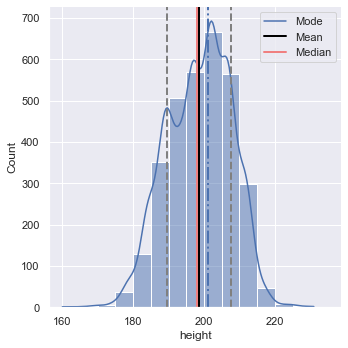

In [6]:
# plotejem les dades en un grfic:
sns.set_theme(style='darkgrid')
sns.displot(nba_players, x='height',kde=True, binwidth=5)
plt.axvline(mean, color='black', linestyle='-', linewidth=2)
plt.axvline(median, color='lightcoral', linestyle='-', linewidth=2)
plt.axvline(mode, color='b', linestyle='-.', linewidth=2)
plt.axvline(stdlow, color='grey', linestyle='dashed', linewidth=2)
plt.axvline(stdhigh, color='grey', linestyle='dashed', linewidth=2)
plt.legend({'Mode':mode,'Mean':mean,'Median':median})

plt.show()

- Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [7]:
print(nba_players['height'].corr(nba_players['born']))
print(nba_players['height'].corr(nba_players['weight']))



0.18221695609092778
0.8174335462572903


## Nivell 2

- Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [8]:
data = nba_players.corr()
data

,height,weight,born
height,1.000000,0.817434,0.182217
weight,0.817434,1.000000,0.290262
born,0.182217,0.290262,1.000000


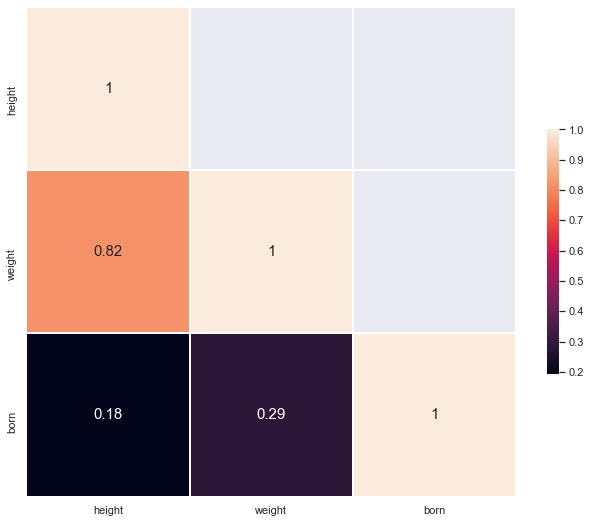

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data, dtype=bool), k=1)
mask
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data,annot=True, mask=mask, annot_kws={"size":15}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, robust=True)
plt.show()

## Nivell 3

- Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [20]:
# Calculem la mitjana geométrica del atributs 'Weight' i 'height': 
print('geometric mean')
print('weight:',stats.gmean(nba_players['weight']))
print('height:',stats.gmean(nba_players['height']))

# El mateix pero aplicant la formula al dataframe:
print(stats.gmean(nba_players.iloc[:,1:3], axis=0))

geometric mean
weight: 94.00240619530145
height: 198.45600901690463
[198.45600902  94.0024062 ]


In [18]:
# Calculem la mitjana armónica del atributs 'Weight' i 'height': 
print('harmonic mean')
print('weight:',stats.hmean(nba_players['weight']))
print('height:',stats.hmean(nba_players['height']))

# El mateix pero aplicant la formula al dataframe:
print(stats.hmean(nba_players.iloc[:,1:3], axis=0))

harmonic mean
weight: 93.29369183767278
height: 198.24668078643356
[198.24668079  93.29369184]


In [28]:
#comparem els tres tipus de mitjana: 
Arithmetic = list(nba_players.iloc[:,1:3].mean())
harmonic = stats.hmean(nba_players.iloc[:,1:3], axis=0)
geometric = stats.gmean(nba_players.iloc[:,1:3], axis=0)

means_df = pd.DataFrame(list(zip(Arithmetic, harmonic, geometric)), columns = ['Aritmetic', 'Harmonic', "Geometric"], index=['Height', 'Weight'])
means_df

,Aritmetic,Harmonic,Geometric
Height,198.663531,198.246681,198.456009
Weight,94.723424,93.293692,94.002406
